# Coding Applications in Medicine: Image Processing Basics

We're going to start the class off with some basic image processing. We'll take one image and perform some basic operations on it to learn about how machines store and manipulate images. The image we will be using today is one many UIC medical students should recognize.

### **[Dependencies](#install-dependencies)**<br>
### **[Set Up](#set-up)**<br>
### **[Cropping](#cropping)**<br>
### **[Colors](#colors)**<br>
### **[Grayscale](#grayscale)**<br>
### **[OpenCV](#opencv)**<br>
### **[Resizing](#resizing)**<br>
### **[Thresholding](#thresholding)**<br>
### **[Blurring](#blurring)**<br>
### **[Edge Detection](#edge-detection)**<br>
### **[Next Steps](#next-steps)**<br>

## Install Dependencies 

In [ ]:
# Here we are going to install all of the packages we need for this notebook
!pip install numpy
!pip install matplotlib
!pip install Pillow
!pip install opencv-python

## Set Up

In [157]:
# Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

### We can load ben using the file path of the image (ben.jpg) and the pillow library we imported. REMEMBER- as images are represented as matrices we will use the numpy library to import ben as an np.array

In [158]:
# Load the image
ben = np.asarray(Image.open("ben.jpg"))

### The image is a bunch of triads of numbers! This is the red green and blue color channels of each pixel which come together to form the image. 

In [159]:
# Let's see how the image is stored
print(ben)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 82  54  66]
  [ 83  56  65]
  [ 83  57  66]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 81  54  61]
  [ 82  55  60]
  [ 83  56  61]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 84  54  62]
  [ 84  54  62]
  [ 82  53  58]]]


### Lets check out some of the information on Ben to see what we are working with in simpler terms


In [160]:
# Because ben is a matrix, we can use ben.shape to print the dimensions of the matrix
print(ben.shape)

(2664, 4560, 3)


### What does this mean? Ben is an 3 dimensional matrix (RGB) with 2664 rows and 4560 columns


### Lets now display the image to take a look at our beloved Ben

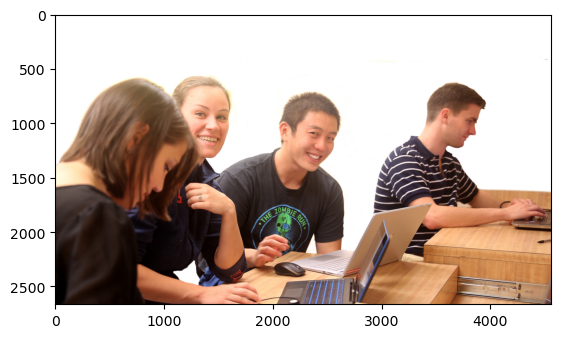

In [161]:
# Plot the image
imgplot = plt.imshow(ben)

### Now that we know what Ben looks like, can we modify the image at all? Lets start simply by changing rows 0-100 to be only the red color (RGB-255,0,0)

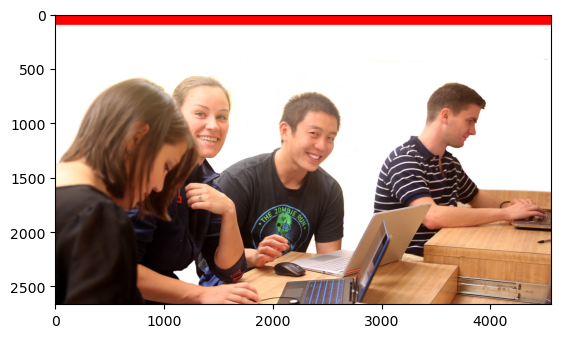

In [162]:
# Create a copy of ben to avoid modifying the original array
ben_copy = np.copy(ben)

# Change the first 100 rows to red
ben_copy[:100, :] = [255, 0, 0] #  this notation in ben copy selects the first 100 rows, and all of the columns

# Plot the image
imgplot = plt.imshow(ben_copy)

### What if we want to make the 1000-1500 rows Blue?

In [ ]:
ben_copy[1000:1500, :] = [0, 0, 255]

# Plot the image
imgplot = plt.imshow(ben_copy)

### Now lets modify the 1000-2000 columns to be green

In [ ]:
ben_copy[:, 1000:2000] = [0, 255, 0]

# Plot the image
imgplot = plt.imshow(ben_copy)

### I think we have now sufficiently bastardized ben... jk

## Cropping 

Next let's learn how to crop images. Notice in the image above the axes are slightly different that what normal X-Y plotting should be. The y-xis is going doing down. Additionally, when stored in a matrix, the y-coordinates actually come first and the x. So, a point would look something like (y1, x1). Let's index a matrix to crop Ben's head.

In [ ]:
# This crop would be a 800 x 800 pixel square. 
# Y-coordinates 700-1500 and x-coordinates 1900-2700, the third colon notates that we want all of the color channels
cropped_ben = ben[700:1500,1900:2700,:]

In [ ]:
# Show the cropped image
imgplot = plt.imshow(cropped_ben)

In [ ]:
# Now let's replace Ben's head with another head
dog = np.asarray(Image.open('dog_head.jpg'))
# Crop the image so that it's also a 800x800 pixel square
dog_head = dog[20:820,540:1340,:]
# Create a copy of our Benware picture
new_benware = ben.copy()
# Set the pixels of Ben's head to the new head
new_benware[700:1500,1900:2700,:] = dog_head
# Show the image
plt.imshow(new_benware)

### What happens if we select ben with only the first color channel?

In [ ]:
cropped_ben = ben[700:1500,1900:2700,0:1]
imgplot = plt.imshow(cropped_ben)

### This essentially converts ben to a grayscale picture. There are much better ways we can do this which we will go over later, but for now lets try displaying ben using a color map and looking at the size of the mew matrix

In [ ]:
print(cropped_ben.shape)
imgplot = plt.imshow(cropped_ben, cmap='gray')
print(cropped_ben)

### Notice how when we print the raw value that makes up ben it is only values from a scale of 0-255. Grayscale! Lets now dig into some more complex color operations invovlving our dear friend

## Colors

### We will start with more manual operations to mess with the colors and end with some built in methods from OpenCVqqqqqqqqq

### As mentioned before, color channels are stored as a list of 3 numbers for the Red, Green, and Blue channels. Each number represents how much of each color is represented in the pixel with 0 being none and 255 being the most. Thus, [255, 0, 0] would be a completely red pixel, [0, 255, 0] would be green, and so on. Once all the channels are used, we can make all different colors. Let's see what happens when we switch around the colors.

In [ ]:
# Make a copy of Ben
ben_GBR = ben.copy()
# Save a temporary copy of the Red channel 
benR = ben_GBR[:, :, 0] 
# Set the R as G
ben_GBR[:, :, 0] = ben_GBR[:, :, 1]
# Set the G as B
ben_GBR[:, :, 1] = ben_GBR[:, :, 2]
# Set the B as old R
ben_GBR[:, :, 2] = benR

In [ ]:
# Show the new image (this would now be [Green, Blue, Red])
imgplot = plt.imshow(ben_GBR)

In [ ]:
ben_BRG = ben.copy()
## Try this yourself and make an image that is [Blue, Red, Green] or any other combination like [Blue, Green, Blue]

## Grayscale 

Now, let's try putting on a "filter" such as a grayscale. There are two ways to calculate grayscale using the existing color channels manually:
1. (R+G+B)/3
2. 0.299R + 0.587G + 0.114B

In [ ]:
# Option 1
ben_gray = (ben[:, :, 0] + ben[:, :, 1] + ben[:, :, 2])/3

In [ ]:
# This doesn't look quite right
imgplot = plt.imshow(ben_gray, cmap='gray')

In [ ]:
# Option 2
ben_gray_weighted = 0.299*ben[:, :, 0] + 0.587*ben[:, :, 1] + 0.114*ben[:, :, 2]

In [ ]:
# This one looks much better!
imgplot = plt.imshow(ben_gray_weighted, cmap='gray')

### Why did option 2 look so much better? Because option 1 assumed each color channel (RGB) had equal importance to the final image makeup. Option 2 takes into account the relative contribution of each channel using luminance coefficients. You will *never* need to know how or why these works, but this is why the second option looks so much cleaner

## OpenCV

### OpenCV is the workhorse image processing library in computer vision. We will now go through some of the main operations in image processing using the openCV library. REMEMBER- none of this needs to or should be memorized. The point of these cells is to simply show what tools are easily available to you in the realm of basic image processing

## Built in color conversion using OpenCV
### Fortunately, there are many pre built operations that allow us to easily flip between channels on an image. OpenCV provides us with numerous options for this. Lets take a look


In [ ]:
# lets reload ben using the OpenCV tools.  Under the hood, openCV stores images as numpy arrays, but the built in methods handle a lot of this for us. 
# it is important to know they are stored as numpy arrays, because all the earlier operations such as cropping etc still work when using this library, however the syntax is slightly different in certain cases
ben_openCV = cv2.imread("ben.jpg")
imgplot = plt.imshow(ben_openCV)

### Oh NO! Why is ben blue.. no one needed that
### OpenCV loads images in the BGR channel format. This means that the all the red pixels are represented as blue and vice versa. We can easily fix this

In [ ]:
ben_rgb = cv2.cvtColor(ben_openCV, cv2.COLOR_BGR2RGB) # this is pretty self explanatory, but basically this method takes BGR and convertes to (2) RGB
imgplot = plt.imshow(ben_rgb)

### Much better...
### lets use this one going forward. What about greyscale?

In [ ]:
gray_ben = cv2.cvtColor(ben_rgb, cv2.COLOR_RGB2GRAY) # note we use RGB now instead of BGR 
## with no color map- matplotlib arbitrarily chooses a color map. dont panic when you see the yellow and blue!
imgplot = plt.imshow(gray_ben)


In [ ]:
## with color map
imgplot = plt.imshow(gray_ben, cmap='gray')

### Now a rapid fire of just a few of the color conversions available in OpenCV

In [ ]:
hsv_ben = cv2.cvtColor(ben_rgb, cv2.COLOR_RGB2HSV) # hue saturation value
imgplot = plt.imshow(hsv_ben)

In [ ]:
lab_ben = cv2.cvtColor(ben_rgb, cv2.COLOR_RGB2Lab) # CIELAB color space
imgplot = plt.imshow(lab_ben)

In [ ]:
yuv_ben = cv2.cvtColor(ben_rgb, cv2.COLOR_RGB2YUV) # YUV color space
imgplot = plt.imshow(yuv_ben)

In [ ]:
xyz_ben = cv2.cvtColor(ben_rgb, cv2.COLOR_RGB2XYZ) # CIE XYZ color space
imgplot = plt.imshow(xyz_ben)

## Resizing

### Resizing images is a critical part of image processing. Fortunately this is very easy in OpenCV. These types of operations become particularly important for data preparation for machine learning.

In [ ]:
# Set the desired width and height for resizing
# Play around with these and see what happens
width = 500
height = 300

# Resize the image to the specified width and height
resized_image = cv2.resize(ben_rgb, (width, height))
imgplot = plt.imshow(resized_image)

### It would be nice to be able to resize an image without completely ruining it if the dimensions are off. How can we do this?

In [ ]:
#Method 1- Using scale factor

# Set the scale factor for resizing
scale_factor = 1.5

print(ben_rgb.shape)

# Resize the image based on the scale factor
resized_image = cv2.resize(ben_rgb, None, fx=scale_factor, fy=scale_factor)
imgplot = plt.imshow(resized_image)
# note the axes!!!!


In [ ]:
# Option 2: Use Aspect Ratio (very very useful if youu have a lot of images you need to make the same size. May need to add padding around the outside to preserve if images do not come to you standardized)

# Set the desired width while preserving the aspect ratio
new_width = 800

# Calculate the new height based on the aspect ratio
aspect_ratio = ben_rgb.shape[1] / ben_rgb.shape[0]
new_height = int(new_width / aspect_ratio)

# Resize the image to the new width and height
resized_image = cv2.resize(ben_rgb, (new_width, new_height))
imgplot = plt.imshow(resized_image)
# note the axes!!!!


### Now, to be fair many of these are quite uncommon in every day use, but it is good to know you can do it!

## Thresholding

### Sometimes we want to easily segment an image into meaningful regions based on some type of apriori knowledge about the data to simplify downstream usecases. Thresholding is a way to do that. We will now go through some of the thresholding options easily handed to you in openCV. We will use the greyscale image becasue each pixel only has one value

In [ ]:
# first make sure we still have our RGB image of Ben to work with as a sanity check
imgplot = plt.imshow(gray_ben, cmap='gray')

In [ ]:
_, binary_image = cv2.threshold(gray_ben, 127, 255, cv2.THRESH_BINARY)
# Explanation: Performs global thresholding on gray_ben, where pixel values above the threshold (127) are set to 255 (white), and below are set to 0 (black)
imgplot = plt.imshow(binary_image,cmap='gray')


In [ ]:
_, binary_inv_image = cv2.threshold(gray_ben, 127, 255, cv2.THRESH_BINARY_INV)
# Explanation: Performs global thresholding on gray_ben, where pixel values above the threshold (127) are set to 0 (black), and below are set to 255 (white)
imgplot = plt.imshow(binary_inv_image,cmap='gray')


In [ ]:
adaptive_mean_image = cv2.adaptiveThreshold(gray_ben, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Explanation: Performs adaptive thresholding on gray_ben using the mean of the neighborhood. The image is divided into small regions (11x11) and the threshold is calculated for each region based on the mean value of that region.
imgplot = plt.imshow(adaptive_mean_image,cmap='gray')


In [ ]:
adaptive_gaussian_image = cv2.adaptiveThreshold(gray_ben, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# Explanation: Performs adaptive thresholding on gray_ben using a weighted sum of the neighborhood values, where the weights are based on a Gaussian window. The image is divided into small regions (11x11) and the threshold is calculated for each region based on the weighted sum.
imgplot = plt.imshow(adaptive_gaussian_image,cmap='gray')


In [ ]:
_, otsu_image = cv2.threshold(gray_ben, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Explanation: Performs Otsu's thresholding on gray_ben, where the threshold value is automatically determined using the Otsu's method. The threshold separates the image into foreground and background based on minimizing the variance between the classes.
imgplot = plt.imshow(otsu_image,cmap='gray')


## Blurring

### Blurring is a fundamental technique to remove noise from images. The math behind how these algorithms work can be complex, but we will now demonstrate some of the built in OpenCV methods to blur/ smooth an image

In [ ]:
# Apply Gaussian blur to the image
gaussian_blur_image = cv2.GaussianBlur(ben_rgb, (5, 5), 0) # arguments: image, kernel, standard deviation (0 calculates automatically. Use 0 unless you have a good reason not to)
imgplot = plt.imshow(gaussian_blur_image)


### Hm... not much action. Lets increase the size of the kernel to increase the blur

In [ ]:
# Apply Gaussian blur to the image
gaussian_blur_image = cv2.GaussianBlur(ben_rgb, (105, 105), 0) # arguments: image, kernel (must be POSITIVE ODD integers), standard deviation (0 calculates automatically. Use 0 unless you have a good reason not to)
imgplot = plt.imshow(gaussian_blur_image)


In [ ]:
# Apply median blur to the image
median_blur_image = cv2.medianBlur(ben_rgb, 105) # arguments: image, number of neighbors for each pixel to take median value of (must be positive odd integer)
imgplot = plt.imshow(median_blur_image)


## Edge Detection

### Edge detection is the most complicated methods we will talk about here, but also one of the most powerful. It can be used to to automatically find edges in images. It is not hard to think of many use cases. Do not worry at this point about understanding the underlying algorithms, but instead know that these agorothms exist and you can apply them to your problems

In [ ]:
### Apply Canny edge detection to gray ben

# set some intial thresholds and tweak to achieve desired result. This requires lots of 'playing'...
# lower threshold- any gradient value below this value is ignored
threshold1 = 100
# upper threshld- edges with gradient value above this threshold are strong and kept
threshold2= 230



edges = cv2.Canny(gray_ben, threshold1, threshold2)

# Display the edges
imgplot = plt.imshow(edges, cmap='gray')

In [ ]:
# Apply Sobel edge detection to gray ben (annotations generated by ChatGPT because I really dont understand this one... I just know it is useful soimetiems lol)

# Determine the size of the Sobel kernel
sobel_kernel = 3

# Set up the Sobel operator to detect edges

# Apply the Sobel operator along the x-axis (horizontal gradient) using cv2.Sobel()
sobel_x = cv2.Sobel(gray_ben, cv2.CV_64F, 1, 0, ksize=sobel_kernel)

# Apply the Sobel operator along the y-axis (vertical gradient) using cv2.Sobel()
sobel_y = cv2.Sobel(gray_ben, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

# Calculate the magnitude of the edge gradients

# Calculate the magnitude of the gradients using numpy.sqrt() by combining the squared x and y gradients
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the edge magnitude

# Display the magnitude image using plt.imshow() with the 'gray' colormap
imgplot = plt.imshow(magnitude, cmap='gray')



<a id='next-steps'></a>
## Next Steps

## Now that you have a basic understanding of images and how the computer sees and manipulates them, try to do some of the projects given in the folder! They're medically related so you can put your new coding knowledge to use!